<a href="https://colab.research.google.com/github/Godwin-Anku/machine-learning-models/blob/main/Machine_Learning_Project_Melbourne_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
X_full_data = pd.read_csv('/content/train (1).csv')
print(X_full_data.shape)
X_full_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
y = X_full_data.SalePrice
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [111]:
X_full_data.dropna(axis = 0, subset = ['SalePrice'], inplace = True)
X_full_data.drop(['SalePrice'], axis = 1, inplace = True)
print(X_full_data.shape)
X_full_data.head()

(1460, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [112]:
low_cardinality_cols = [cname for cname in X_full_data.columns if X_full_data[cname].dtype == 'object' and X_full_data[cname].nunique() < 10]
print(len(low_cardinality_cols))
low_cardinality_cols

40


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [113]:
numerical_cols = [cols for cols in X_full_data.columns if X_full_data[cols].dtypes in ['int64', 'float64']]
print(len(numerical_cols))
numerical_cols

37


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [114]:
final_cols = low_cardinality_cols + numerical_cols
X_final = X_full_data[final_cols]
print(X_final.shape)
X_final.head()

(1460, 77)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,...,460,298,0,0,0,0,0,0,5,2007
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,608,0,42,0,0,0,0,0,9,2008
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,642,0,35,272,0,0,0,0,2,2006
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,836,192,84,0,0,0,0,0,12,2008


In [115]:
cols_with_missing_val = [col_name for col_name in X_final.columns if X_final[col_name].isnull().any()]
print(len(cols_with_missing_val))
cols_with_missing_val

19


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

**Transformation Pipeline**

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


numerical_transformation = SimpleImputer(strategy = 'median')
categorical_transformation = Pipeline(steps = [('impute', SimpleImputer(strategy = 'constant')), ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [('num', numerical_transformation, numerical_cols), ('cat', categorical_transformation, low_cardinality_cols)])
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
my_pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('model', model)])

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [118]:
X_train

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,645,576,36,0,0,0,0,0,2,2009
682,RL,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Norm,Norm,...,431,307,0,0,0,0,0,0,11,2008
960,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,0,117,0,0,0,0,0,0,2,2010
1384,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,280,0,0,0,0,0,0,0,10,2009
1100,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Norm,Norm,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,576,0,0,112,0,0,0,0,8,2007
763,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,856,0,128,0,0,180,0,0,7,2009
835,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,436,290,0,0,0,0,0,0,2,2010
1216,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,RRAe,Norm,...,539,0,0,0,0,0,0,0,4,2010


In [119]:
X_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
529,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,484,0,0,200,0,0,0,0,3,2007
491,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Artery,Norm,...,240,0,0,32,0,0,0,0,8,2006
459,RL,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,Norm,Norm,...,352,0,0,248,0,0,0,0,7,2009
279,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,505,288,117,0,0,0,0,0,3,2008
655,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,264,0,0,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,RL,Pave,NaN,IR1,Low,AllPub,CulDSac,Sev,Norm,Norm,...,439,81,0,0,0,0,0,0,4,2008
445,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,480,0,0,0,0,0,0,0,11,2009
654,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,839,236,46,0,0,0,0,0,8,2008
1280,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,544,0,72,0,0,0,0,0,3,2009


In [120]:
y_train

64      219500
682     173000
960     116500
1384    105000
1100     60000
         ...  
1383    112000
763     337000
835     128000
1216    112000
559     234000
Name: SalePrice, Length: 1021, dtype: int64

In [121]:
y_test

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
271     241500
445     127500
654     350000
1280    227000
898     611657
Name: SalePrice, Length: 438, dtype: int64

In [122]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'Ful...
                                                   'LotConfig', 'LandSlope',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'FireplaceQu', ...])])),
                ('model', RandomForestRegressor(random_state=0))])

In [123]:
y_predict = my_pipeline.predict(X_test)
y_predict

array([208241.36, 151868.07, 107408.63, 222674.4 ,  91233.93, 105215.75,
       258671.91, 119644.93, 489592.02, 153176.8 , 186216.93, 147556.82,
       228053.4 , 115563.77, 122899.5 , 146855.87, 226625.65, 113611.  ,
       142769.91, 192207.78, 126999.58, 142155.5 , 109181.43, 172223.72,
       184979.42, 218850.79, 169112.46,  88427.49, 350641.29, 116986.83,
       138640.96, 197904.03, 140366.5 , 291827.63, 363204.79, 182731.55,
       283137.67, 126535.83, 227523.86, 306927.77, 205092.56, 128131.  ,
       180381.74, 298828.66, 332492.21, 148356.01, 125038.33, 129045.  ,
       169481.04, 107032.77, 386747.26, 147799.12, 170175.1 ,  92683.22,
       249614.06, 114359.83, 136075.92, 242614.2 , 144763.5 , 106314.77,
       144396.  , 133121.25, 147576.  , 158945.32, 192128.32, 158013.37,
       128296.83, 214677.13, 123507.04, 192791.93, 180232.1 , 120535.25,
        85090.83, 225244.66, 102192.5 , 260131.49, 130641.5 , 112124.03,
       278985.68, 162801.91, 135611.87, 128685.83, 

In [124]:
from sklearn.metrics import mean_absolute_error

score = mean_absolute_error(y_test, y_predict)
print(f'MAE: {score:,}')

MAE: 17,573.62997716895


In [125]:
from sklearn.model_selection import cross_val_score

def process_pipeline(estimators, num_strategy, cat_strategy, cv_num):
  numerical_transformation = SimpleImputer(strategy = num_strategy)
  categorical_transformation = Pipeline(steps = [('impute', SimpleImputer(strategy = cat_strategy)), ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

  preprocessor = ColumnTransformer(transformers = [('num', numerical_transformation, numerical_cols), ('cat', categorical_transformation, low_cardinality_cols)])
  model = RandomForestRegressor(n_estimators = estimators, random_state = 0)
  my_pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('model', model)])
  scores = -1 * cross_val_score(my_pipeline, X_final, y, cv = cv_num, scoring = 'neg_mean_absolute_error')
  return scores.mean()


In [126]:
estimator_dict = {}
for i in range(1, 9):
  estimator_dict[50*i] = process_pipeline(50*i, num_strategy = 'most_frequent', cat_strategy = 'most_frequent', cv_num = 5)

print(estimator_dict)

{50: 17926.85905479452, 100: 17689.054897260277, 150: 17675.90998630137, 200: 17668.353311643838, 250: 17683.61860821918, 300: 17671.0745456621, 350: 17668.552481409002, 400: 17671.983493150685}


In [127]:
print(f'Minimum score: {min(estimator_dict.values())}')

Minimum score: 17668.353311643838


**Optimal architecture of Radom Forest Model**

In [128]:
print(f'Optimal Random Forest Architecture is: {min(estimator_dict, key = estimator_dict.get)}')

Optimal Random Forest Architecture is: 200


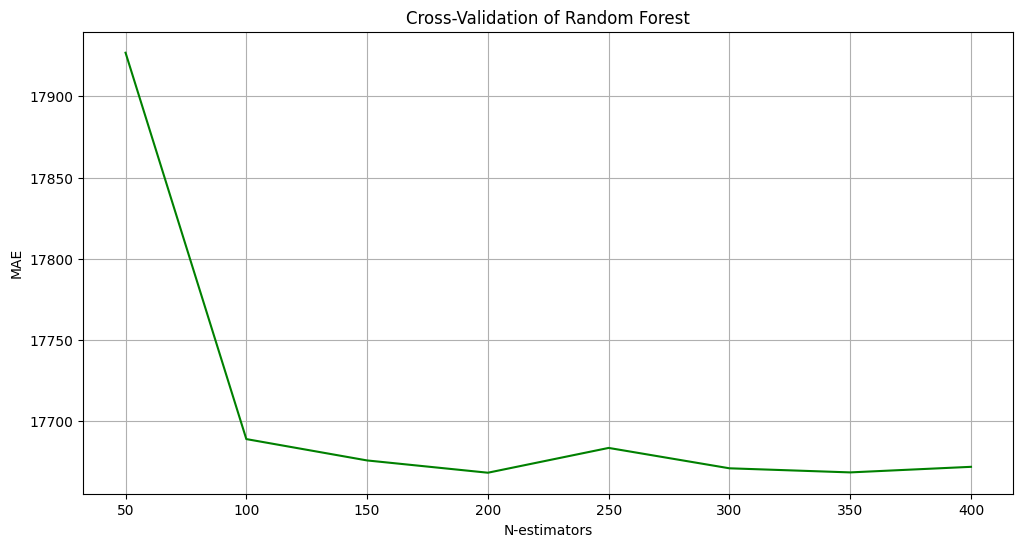

In [130]:
plt.figure(figsize = (12, 6))
plt.plot(estimator_dict.keys(), estimator_dict.values(), color = 'green')
plt.xlabel('N-estimators')
plt.ylabel('MAE')
plt.grid(True)
plt.title('Cross-Validation of Random Forest')
plt.show()